Part 1: Setup and Data Acquisition

In [1]:
### Part 1: Setup and Data Acquisition
# In this section, we import all necessary libraries for our analysis.
# We also establish a connection to the WRDS database to pull our raw data.

# --- 1.1: Import Libraries ---
import pandas as pd
import numpy as np
import wrds

# Matplotlib and Seaborn are for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# --- 1.2: Connect to WRDS ---
# We establish our connection to the WRDS database.
# This requires an active WRDS subscription.
# You will be prompted for your username and password the first time.
print("Connecting to WRDS...")
db = wrds.Connection()
print("WRDS connection successful.")

Connecting to WRDS...
WRDS recommends setting up a .pgpass file.
pgpass file created at C:\Users\campb\AppData\Roaming\postgresql\pgpass.conf
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done
WRDS connection successful.


In [3]:
# --- 1.3: Define Parameters ---
# We define our key study parameters here so they can be easily changed.
START_YEAR = 2020
END_YEAR = 2025
BIG_4_AUDITORS = ['DELOITTE & TOUCHE LLP', 'ERNST & YOUNG LLP', 'KPMG LLP', 'PRICEWATERHOUSECOOPERS LLP']
# Note: We may need to verify these exact auditor names in the database.

In [4]:
# --- 1.4: Query Audit Fee Data ---
# We query the Audit Analytics 'Audit + Compliance' library (audcomp).
# We pull key company info, audit fees, and financial variables.
# We also filter for our study years (2020-2025) and Big 4 auditors.

print("Querying Audit Fee data...")

# Note on WRDS schemas:
# The Audit Fees table is often in the 'audit_fees' table within the 'audcomp' schema.
# Let's start by inspecting that table's columns.
try:
    print("\n--- Audcomp Schema (Audit Fees) ---")
    audcomp_cols = db.list_columns('audcomp', 'audit_fees')
    print(f"Found {len(audcomp_cols)} columns in audcomp.audit_fees.")
    # print(audcomp_cols) # Uncomment to see all columns
except Exception as e:
    print(f"Could not inspect 'audcomp.audit_fees'. Error: {e}")
    print("Please double-check the schema and table name in your WRDS subscription.")

Querying Audit Fee data...

--- Audcomp Schema (Audit Fees) ---
Could not inspect 'audcomp.audit_fees'. Error: 'Connection' object has no attribute 'list_columns'
Please double-check the schema and table name in your WRDS subscription.


In [5]:
# --- 1.4a: List All Available Schemas ---
# Since 'audcomp.audit_fees' failed, let's find the correct schema.
# We will list all database libraries (schemas) your account has access to.

print("Listing all available WRDS schemas (libraries)...")
try:
    all_schemas = db.list_libraries()
    print("\n--- Your Available Schemas ---")
    print(all_schemas)
    print("\n--------------------------------")

except Exception as e:
    print(f"Error listing schemas: {e}")

Listing all available WRDS schemas (libraries)...

--- Your Available Schemas ---
['aha_sample', 'ahasamp', 'audit', 'audit_acct_os', 'audit_audit_comp', 'audit_common', 'audit_corp_legal', 'auditsmp', 'auditsmp_all', 'bank', 'bank_all', 'bank_premium_samp', 'banksamp', 'block', 'block_all', 'boardex', 'boardex_na', 'boardex_trial', 'boardsmp', 'bvd_amadeus_trial', 'bvd_bvdbankf_trial', 'bvd_orbis_trial', 'bvdsamp', 'calcbench_trial', 'calcbnch', 'candid_samp', 'cboe', 'cboe_all', 'cboe_sample', 'cboesamp', 'cddsamp', 'ciq', 'ciq_capstrct', 'ciq_common', 'ciq_pplintel', 'ciq_transcripts', 'ciqsamp', 'ciqsamp_capstrct', 'ciqsamp_common', 'ciqsamp_keydev', 'ciqsamp_pplintel', 'ciqsamp_ratings', 'ciqsamp_transactions', 'ciqsamp_transcripts', 'cisdmsmp', 'columnar', 'comp', 'comp_bank_daily', 'comp_execucomp', 'comp_na_daily_all', 'comp_segments_hist_daily', 'compsamp', 'compsamp_all', 'compsamp_snapshot', 'compseg', 'contrib', 'contrib_as_filed_financials', 'contrib_ceo_turnover', 'contri

In [6]:
# --- 1.4b: List Tables in the Audit Fee Schema ---
# Now that we see 'audit_audit_comp' in the list, let's look inside it
# for a table related to audit fees.

print("\n--- Listing Tables in 'audit_audit_comp' (Audit Fees) ---")
try:
    audit_comp_tables = db.list_tables(library='audit_audit_comp')
    print("Tables found:")
    print(audit_comp_tables)
except Exception as e:
    print(f"Error listing tables in 'audit_audit_comp': {e}")


--- Listing Tables in 'audit_audit_comp' (Audit Fees) ---
Tables found:
['f01_auditor_affiliate', 'f01_auditor_event', 'f01_auditor_event_to_auditor', 'f01_auditor_event_type', 'f01_auditor_location', 'f01_deleted_keys', 'f01_sec_locations', 'f02_deleted_keys', 'f03_deleted_keys', 'f04_deleted_keys', 'f06_deleted_keys', 'f06_form_ap_divided', 'f06_form_ap_filing', 'f06_form_ap_not_divided', 'f10_deleted_keys', 'f10_ic_dis_con_qua', 'f10_ic_dis_con_rea', 'f10_ic_qualifier', 'f10_ic_reason', 'f11_deleted_keys', 'f11_ic_opinion_qualifier', 'f11_ic_opinion_reason', 'f11_ic_qualifier', 'f11_ic_reason', 'f16_deleted_keys', 'f17_deleted_keys', 'f17_dno_change', 'f20_deleted_keys', 'f20_nt_fil_not_to_rea', 'f20_nt_filer_reason', 'f34_aud_opi_to_goi_con_iss', 'f34_deleted_keys', 'f34_form_ap_divided', 'f34_form_ap_filing', 'f34_form_ap_not_divided', 'f34_going_concern_issues', 'f39_res_aud_beg_end', 'f39_restatement_auditor_period', 'f39_restatement_category', 'f39_restatement_filings', 'f39_r

In [7]:
# --- 1.5b: List Tables in the CAM Schema ---
# Let's also look inside 'audit_acct_os' for a table related to CAMs.

print("\n--- Listing Tables in 'audit_acct_os' (CAMs) ---")
try:
    acct_os_tables = db.list_tables(library='audit_acct_os')
    print("Tables found:")
    print(acct_os_tables)
except Exception as e:
    print(f"Error listing tables in 'audit_acct_os': {e}")


--- Listing Tables in 'audit_acct_os' (CAMs) ---
Tables found:
['f56_acc_est_cha_fil', 'f56_acc_est_tax', 'f56_acc_est_to_tax', 'f74_aqrm_company_flags', 'f74_fee_sup_acc_est_cha', 'f74_fee_sup_aud_cha', 'f74_fee_sup_aud_fee_out', 'f74_fee_sup_aud_rat', 'f74_fee_sup_civ_rig_lit', 'f74_fee_sup_dis_com', 'f74_fee_sup_dis_con', 'f74_fee_sup_emp_lab_lit', 'f74_fee_sup_eng_par_cha', 'f74_fee_sup_env_lit', 'f74_fee_sup_fin_res', 'f74_fee_sup_ill_act_lit', 'f74_fee_sup_int_con', 'f74_fee_sup_int_pro_lit', 'f74_fee_sup_mat_imp', 'f74_fee_sup_non_aud_fee', 'f74_fee_sup_per_adj', 'f74_fee_sup_ple_sec', 'f74_fee_sup_reg_lit', 'f74_fee_sup_sha_act', 'f74_fee_sup_sha_act_lit', 'f74_feed_support74_altman_score', 'f74_feed_support74_audit_fees', 'f74_feed_support74_beneish_score', 'f74_feed_support74_benfords_law', 'f74_feed_support74_ceo_change', 'f74_feed_support74_cfo_change', 'f74_feed_support74_cybersecurity', 'f74_feed_support74_going_concern', 'f74_feed_support74_late_filings', 'f78_feed_supp

In [8]:
# --- 1.6: Get Columns by Querying for 1 Row (Audit Fees) ---
# A more direct way to get column names is to query for one row
# and look at the columns of the resulting DataFrame.

print("\n--- Getting columns from 'feed03_audit_fees' ---")
try:
    # Query for 1 row from the 'feed03_audit_fees' table
    fees_sample_df = db.raw_sql("SELECT * FROM audit_audit_comp.feed03_audit_fees LIMIT 1")

    print("Successfully queried 1 row. Columns found:")
    # Print the list of columns
    print(fees_sample_df.columns.tolist())

except Exception as e:
    print(f"Error querying 'audit_audit_comp.feed03_audit_fees': {e}")


# --- 1.7: Get Columns by Querying for 1 Row (CAMs) ---
print("\n--- Getting columns from 'feed78_critical_audit_matters' ---")
try:
    # Query for 1 row from the 'feed78_critical_audit_matters' table
    cam_sample_df = db.raw_sql("SELECT * FROM audit_acct_os.feed78_critical_audit_matters LIMIT 1")

    print("Successfully queried 1 row. Columns found:")
    # Print the list of columns
    print(cam_sample_df.columns.tolist())

except Exception as e:
    print(f"Error querying 'audit_acct_os.feed78_critical_audit_matters': {e}")


--- Getting columns from 'feed03_audit_fees' ---
Successfully queried 1 row. Columns found:
['auditor_fkey', 'audit_gig_key', 'fiscal_year', 'fiscal_year_ended', 'audit_fees', 'non_audit_fees', 'total_fees', 'benefits_fees', 'it_fees', 'tax_fees', 'tax_fees_compliance', 'tax_fees_non_compliance', 'audit_related_fees', 'other_fees', 'currency_code_fkey', 'restatement', 'auditor_name', 'fees_pcaob_reg', 'ftp_file_fkey', 'form_fkey', 'file_date', 'file_accepted', 'file_size', 'http_name_html', 'http_name_text', 'company_fkey', 'matchqu_price_date', 'matchqu_price_close', 'matchqu_tso_date', 'matchqu_tso', 'matchqu_tso_markcap', 'matchqu_date_qtr', 'matchqu_date_ttm', 'matchqu_filing_code_qtr', 'matchqu_filing_code_ttm', 'matchqu_annual_quindic', 'matchqu_balsh_book_val', 'matchqu_balsh_assets', 'matchqu_balsh_cash_equivs', 'matchqu_incmst_rev_qtr', 'matchqu_incmst_rev_ttm', 'matchqu_incmst_netinc_qtr', 'matchqu_incmst_netinc_ttm', 'matchqu_incmst_extraitm_qtr', 'matchqu_incmst_extraitm_t

In [9]:
# --- 1.8: Inspect the 'audit_common' Library ---
# We need to find the 'Audit Opinion' table (to link CAMs to a year)
# and a 'Company' table (to get SIC codes).
# Both are likely in 'audit_common'.

print("\n--- Listing Tables in 'audit_common' ---")
try:
    common_tables = db.list_tables(library='audit_common')
    print("Tables found in 'audit_common':")
    print(common_tables)
except Exception as e:
    print(f"Error listing tables: {e}")


--- Listing Tables in 'audit_common' ---
Tables found in 'audit_common':
['feed12_company_block']


In [10]:
# --- 1.9: Inspect the 'Company Block' Table (for SIC Code) ---
print("\n--- Getting columns from 'feed12_company_block' ---")
try:
    # Query for 1 row
    company_df = db.raw_sql("SELECT * FROM audit_common.feed12_company_block LIMIT 1")

    print("Successfully queried 1 row. Columns found:")
    # Print the list of columns
    print(company_df.columns.tolist())

except Exception as e:
    print(f"Error querying 'audit_common.feed12_company_block': {e}")


# --- 1.10: Inspect the 'SOX 404' Table (for Opinion-to-Year Link) ---
print("\n--- Getting columns from 'feed11_sox_404_internal_controls' ---")
try:
    # Query for 1 row
    opinion_df = db.raw_sql("SELECT * FROM audit_audit_comp.feed11_sox_404_internal_controls LIMIT 1")

    print("Successfully queried 1 row. Columns found:")
    # Print the list of columns
    print(opinion_df.columns.tolist())

except Exception as e:
    print(f"Error querying 'audit_audit_comp.feed11_sox_404_internal_controls': {e}")


--- Getting columns from 'feed12_company_block' ---
Successfully queried 1 row. Columns found:
['company_fkey', 'company_key', 'parent_co_fkey', 'parent_co_name', 'ult_parent_co_fkey', 'ult_parent_co_name', 'name', 'short_name', 'former_name1', 'name_change_date1', 'former_name2', 'name_change_date2', 'former_name3', 'name_change_date3', 'sic_code_fkey', 'sic_code_descrip', 'naics_code_fkey', 'naics_code_descrip', 'loc_state', 'loc_state_name', 'loc_state_region', 'loc_state_country', 'inc_state', 'inc_state_name', 'inc_state_region', 'inc_state_country', 'fiscal_ye', 'bus_addr', 'bus_street1', 'bus_street2', 'bus_city', 'bus_state', 'bus_state_name', 'bus_state_region', 'bus_state_country', 'bus_zip', 'bus_phone', 'mail_addr', 'mail_street1', 'mail_street2', 'mail_city', 'mail_state', 'mail_state_name', 'mail_state_region', 'mail_state_country', 'mail_zip', 'is_in_sp500', 'is_in_nasdaq_composite', 'is_in_djia30', 'is_in_russell_2000', 'best_edgar_ticker', 'market', 'irs_number', 'cur

Part 2: Data Acquisition

In [11]:
### Part 2: Data Acquisition
# Now that we have identified all tables and columns, we will execute
# our final queries to pull the raw data into pandas DataFrames.
# We will pull data in three parts:
#   1. The main Audit Fee & Financial data.
#   2. The Company data (for SIC codes).
#   3. The CAM data (which requires a join to get the fiscal year).

# --- 2.1: Define Parameters ---
# We define our key study parameters here so they can be easily changed.
START_YEAR = 2020
END_YEAR = 2025 # Note: 2025 data may be incomplete
BIG_4_NAMES = ('PricewaterhouseCoopers', 'KPMG', 'Ernst & Young', 'Deloitte & Touche')
# We use 'LIKE' queries for auditor_name, so these short names will work.

In [12]:
# --- 2.2: Query 1 - Get Core Financial & Fee Data ---
# We will pass parameters separately to avoid formatting errors.

print("Starting Query 1: Core Financial & Fee Data...")

# Define the SQL query with placeholders for parameters
sql_fees = """
    SELECT
        company_fkey,
        fiscal_year,
        auditor_name,
        audit_fees,
        matchfy_balsh_assets AS total_assets,
        matchfy_balsh_book_val AS book_value,
        matchfy_incmst_netinc_ttm AS net_income_ttm
    FROM
        audit_audit_comp.feed03_audit_fees
    WHERE
        fiscal_year BETWEEN %(start_year)s AND %(end_year)s
        AND (
            auditor_name LIKE %(aud1)s OR
            auditor_name LIKE %(aud2)s OR
            auditor_name LIKE %(aud3)s OR
            auditor_name LIKE %(aud4)s
        )
"""

# Define the parameters in a dictionary
# Note: START_YEAR and END_YEAR must be defined (from cell 2.1)
fee_params = {
    'start_year': START_YEAR,
    'end_year': END_YEAR,
    'aud1': '%PricewaterhouseCoopers%',
    'aud2': '%KPMG%',
    'aud3': '%Ernst & Young%',
    'aud4': '%Deloitte & Touche%'
}

try:
    # Pass the SQL string and the parameters dictionary
    df_fees = db.raw_sql(sql_fees, params=fee_params)
    print(f"Query 1 successful: Loaded {len(df_fees)} 'Big 4' audit fee records.")
except Exception as e:
    print(f"Error in Query 1: {e}")

Starting Query 1: Core Financial & Fee Data...
Query 1 successful: Loaded 30269 'Big 4' audit fee records.


In [13]:
# --- 2.3: Query 2 - Get Company SIC Codes ---
# We pull the company key and its corresponding SIC code (industry).
# We will merge this into our main df_fees DataFrame later.
print("Starting Query 2: Company SIC Codes...")

sql_company = """
    SELECT
        company_fkey,
        sic_code_fkey AS sic_code
    FROM
        audit_common.feed12_company_block
"""

try:
    df_company = db.raw_sql(sql_company)
    print(f"Query 2 successful: Loaded {len(df_company)} company records.")
except Exception as e:
    print(f"Error in Query 2: {e}")

Starting Query 2: Company SIC Codes...
Query 2 successful: Loaded 459603 company records.


In [14]:
# --- 2.4: Query 3 - Get CAM Data (with Year) ---
print("Starting Query 3: Critical Audit Matters...")

# Define the SQL query with placeholders
sql_cams = """
    SELECT
        t1.company_fkey,
        t1.fy_ic_op AS fiscal_year,
        t2.critical_audit_matter_key,
        t2.topic_name
    FROM
        audit_audit_comp.feed11_sox_404_internal_controls AS t1
    INNER JOIN
        audit_acct_os.feed78_critical_audit_matters AS t2
    ON
        t1.ic_op_fkey = t2.audit_opinion_fkey
    WHERE
        t1.fy_ic_op BETWEEN %(start_year)s AND %(end_year)s
"""

# Define the parameters dictionary
# Note: START_YEAR and END_YEAR must be defined (from cell 2.1)
cam_params = {
    'start_year': START_YEAR,
    'end_year': END_YEAR
}

try:
    # Pass the SQL string and the parameters
    df_cams = db.raw_sql(sql_cams, params=cam_params)
    print(f"Query 3 successful: Loaded {len(df_cams)} individual CAM records.")
except Exception as e:
    print(f"Error in Query 3: {e}")

Starting Query 3: Critical Audit Matters...
Query 3 successful: Loaded 0 individual CAM records.


In [15]:
### Part 2.5: Debugging the CAMs Query
# Rationale: Our Query 3 returned 0 rows. This means either
# the tables are empty for our period, or our join key is incorrect.
# Let's test the tables individually before we join them.

print("--- Debugging Query 3 ---")

# Test 1: Does the 'SOX 404' table (t1) have ANY data in our period?
try:
    sox_test_sql = """
        SELECT COUNT(*) AS row_count
        FROM audit_audit_comp.feed11_sox_404_internal_controls
        WHERE fy_ic_op BETWEEN 2020 AND 2025
    """
    sox_count = db.raw_sql(sox_test_sql)
    print(f"Test 1 (SOX Table): Found {sox_count['row_count'].iloc[0]} rows between 2020-2025.")
except Exception as e:
    print(f"Error in Test 1: {e}")

# Test 2: Does the 'CAMs' table (t2) have ANY data at all?
try:
    cam_test_sql = """
        SELECT COUNT(*) AS row_count
        FROM audit_acct_os.feed78_critical_audit_matters
    """
    cam_count = db.raw_sql(cam_test_sql)
    print(f"Test 2 (CAMs Table): Found {cam_count['row_count'].iloc[0]} total rows.")
except Exception as e:
    print(f"Error in Test 2: {e}")

--- Debugging Query 3 ---
Test 1 (SOX Table): Found 53833 rows between 2020-2025.
Test 2 (CAMs Table): Found 46874 total rows.


In [16]:
### Part 2.6: Finding the Real 'Opinion' Table
# Rationale: Our join failed because 'feed11' was the wrong link table.
# Our new hypothesis is that 'feed34_revised_audit_opinions' is the
# correct table to link 'audit_opinion_fkey' (from CAMs) to a fiscal year.
# Let's inspect its columns.

print("\n--- Getting columns from 'feed34_revised_audit_opinions' ---")
try:
    # Query for 1 row
    opinion_df = db.raw_sql("SELECT * FROM audit_audit_comp.feed34_revised_audit_opinions LIMIT 1")

    print("Successfully queried 1 row. Columns found:")
    # Print the list of columns
    print(opinion_df.columns.tolist())

except Exception as e:
    print(f"Error querying 'audit_audit_comp.feed34_revised_audit_opinions': {e}")


--- Getting columns from 'feed34_revised_audit_opinions' ---
Successfully queried 1 row. Columns found:
['audit_op_key', 'auditor_affil_fkey', 'auditor_affilname', 'auditor_fkey', 'auditor_name', 'sig_date_of_op', 'going_concern', 'auditor_city', 'auditor_state', 'auditor_state_name', 'auditor_country', 'auditor_region', 'auditor_con_sup_reg', 'fiscal_year_of_op', 'fiscal_year_end_op', 'op_aud_pcaob', 'pcaob_reg_num', 'is_nth_add_op', 'note_1_date', 'note_2_date', 'note_3_date', 'note_4_date', 'note_5_date', 'accnt_basis', 'integrated_audit', 'ftp_file_fkey', 'form_fkey', 'file_date', 'file_accepted', 'file_size', 'http_name_html', 'http_name_text', 'company_fkey', 'opinion_text', 'matchqu_price_date', 'matchqu_price_close', 'matchqu_tso_date', 'matchqu_tso', 'matchqu_tso_markcap', 'matchqu_date_qtr', 'matchqu_date_ttm', 'matchqu_filing_code_qtr', 'matchqu_filing_code_ttm', 'matchqu_annual_quindic', 'matchqu_balsh_book_val', 'matchqu_balsh_assets', 'matchqu_balsh_cash_equivs', 'matchq

In [17]:
# --- 2.4: Query 3 - Get CAM Data (with Year) ---
# Rationale: After debugging, we found the correct 'link' table
# is 'feed34_revised_audit_opinions', which connects a CAM's
# 'audit_opinion_fkey' to a 'fiscal_year_of_op'.

print("Starting Query 3 (Revised): Critical Audit Matters...")

# Define the SQL query with placeholders
sql_cams = """
    SELECT
        t1.company_fkey,
        t1.fiscal_year_of_op AS fiscal_year,
        t2.critical_audit_matter_key,
        t2.topic_name
    FROM
        audit_audit_comp.feed34_revised_audit_opinions AS t1
    INNER JOIN
        audit_acct_os.feed78_critical_audit_matters AS t2
    ON
        t1.audit_op_key = t2.audit_opinion_fkey
    WHERE
        t1.fiscal_year_of_op BETWEEN %(start_year)s AND %(end_year)s
"""

# Define the parameters dictionary
# Note: START_YEAR and END_YEAR must be defined (from cell 2.1)
cam_params = {
    'start_year': START_YEAR,
    'end_year': END_YEAR
}

try:
    # Pass the SQL string and the parameters
    df_cams = db.raw_sql(sql_cams, params=cam_params)
    print(f"Query 3 successful: Loaded {len(df_cams)} individual CAM records.")
except Exception as e:
    print(f"Error in Query 3: {e}")

Starting Query 3 (Revised): Critical Audit Matters...
Query 3 successful: Loaded 42832 individual CAM records.


Part 3: Data Merging and Preparation

In [18]:
### Part 3: Data Merging and Preparation
# Rationale: Our data lives in three separate tables. We must
# now combine them into a single, analysis-ready dataset.
# Our main DataFrame will be 'df_fees', and we will add
# 'SIC Code' and 'CAM Count' to it.

if 'df_fees' in locals() and 'df_company' in locals() and 'df_cams' in locals():
    print("All DataFrames present. Starting merge process...")

    # --- 3.1: Aggregate CAMs ---
    # Rationale: df_cams has one row *per CAM*. We need one row
    # *per company-year* with the *count* of CAMs.
    # We group by company and year and count the occurrences.
    print("Aggregating CAM counts...")
    df_cam_counts = df_cams.groupby(['company_fkey', 'fiscal_year']).size().to_frame('cam_count')

    # We also reset the index so 'company_fkey' and 'fiscal_year'
    # become columns again, which is needed for merging.
    df_cam_counts = df_cam_counts.reset_index()

    # --- 3.2: Merge Fees with SIC Codes ---
    # Rationale: We add the 'sic_code' from df_company to df_fees.
    # We use a 'left' join to ensure we keep all our fee records,
    # even if a company has no SIC code (unlikely).
    print("Merging fee data with SIC codes...")
    df_merged = pd.merge(df_fees, df_company, on='company_fkey', how='left')

    # Drop duplicates if any company_fkey appears in df_company multiple times
    # (e.g., if it changed names but had the same fkey)
    df_merged = df_merged.drop_duplicates(subset=['company_fkey', 'fiscal_year'])

    # --- 3.3: Merge with CAM Counts ---
    # Rationale: Now we add our new 'cam_count' to the main DataFrame.
    # The join keys are *both* company and year.
    print("Merging main data with CAM counts...")
    df_final = pd.merge(df_merged, df_cam_counts, on=['company_fkey', 'fiscal_year'], how='left')

    # --- 3.4: Final Cleaning - Handle Missing CAMs ---
    # Rationale: After the left join, companies with *zero* CAMs
    # in a given year will have a 'NaN' (Not a Number) in the 'cam_count' column.
    # For our analysis, NaN really means '0'. We fill these missing
    # values with 0.
    print("Filling missing CAM counts with 0...")
    df_final['cam_count'] = df_final['cam_count'].fillna(0)

    print("\n--- Data Merging and Preparation Complete ---")
    print("Final dataset 'df_final' is ready for analysis.")

    # --- 3.5: Final Inspection ---
    # Let's look at the first few rows and the data types.
    print("\nFinal DataFrame Head:")
    print(df_final.head())

    print("\nFinal DataFrame Info:")
    df_final.info()

else:
    print("One or more DataFrames (df_fees, df_company, df_cams) are missing.")
    print("Please check for errors in Part 2.")

All DataFrames present. Starting merge process...
Aggregating CAM counts...
Merging fee data with SIC codes...
Merging main data with CAM counts...
Filling missing CAM counts with 0...

--- Data Merging and Preparation Complete ---
Final dataset 'df_final' is ready for analysis.

Final DataFrame Head:
  company_fkey  fiscal_year auditor_name  audit_fees  total_assets  \
0   0000001750       2020.0     KPMG LLP   2007000.0  2079000000.0   
1   0000001750       2021.0     KPMG LLP   1930500.0  1539700000.0   
2   0000001750       2022.0     KPMG LLP   1998416.0  1573900000.0   
3   0000001750       2023.0     KPMG LLP   1998132.0  1833100000.0   
4   0000001750       2024.0     KPMG LLP   2952000.0  2770000000.0   

    book_value  net_income_ttm sic_code  cam_count  
0  780900000.0       4400000.0     3720        2.0  
1  850600000.0      35800000.0     3720        2.0  
2  914800000.0      78700000.0     3720        2.0  
3  859600000.0      90200000.0     3720        2.0  
4  39960000

Part 4: Data Cleaning and Feature Engineering

In [19]:
# --- 4.1: Handle Missing Data ---
# Rationale: We must drop any row that is missing a variable
# we intend to use in our model.
print(f"Original row count: {len(df_final)}")

# We define our list of "must-have" columns for the regression
required_cols = ['audit_fees', 'total_assets', 'book_value',
                 'net_income_ttm', 'sic_code', 'cam_count']

# .dropna() removes any row with 'NaN' in this subset
df_clean = df_final.dropna(subset=required_cols)

print(f"Row count after dropping NaNs: {len(df_clean)}")

Original row count: 29706
Row count after dropping NaNs: 14769


In [20]:
# --- 4.2: Handle Non-Positive Values ---
# Rationale: We cannot take the log of zero or a negative number.
# Financial data (like 'audit_fees' and 'total_assets') must be
# positive. We'll filter for this. 'book_value' can be negative,
# so we'll be careful.

df_clean = df_clean[df_clean['audit_fees'] > 0]
df_clean = df_clean[df_clean['total_assets'] > 0]

# For book_value, we will only log it if it's positive.
# For net_income, we'll create a separate 'is_loss' flag.

print(f"Row count after ensuring 'fees' and 'assets' > 0: {len(df_clean)}")

Row count after ensuring 'fees' and 'assets' > 0: 14739


In [21]:
### Part 4.3: Feature Engineering (Log Transforms)
# Rationale: This is a key part of our proposal. We log these
# variables to reduce skewness and model the relationships
# in proportional terms (elasticity).

# Import numpy for log function
import numpy as np

# Log transform fees and assets
df_clean['log_audit_fees'] = np.log(df_clean['audit_fees'])

# --- CORRECTED LINE BELOW ---
# My original code had a typo. This is the correct line.
df_clean['log_total_assets'] = np.log(df_clean['total_assets'])

# Log transform book_value only where it's positive
# We create 'log_book_value' and fill negatives/zeros with NaN
# This line is *expected* to produce a RuntimeWarning, which is fine.
df_clean['log_book_value'] = np.where(
    df_clean['book_value'] > 0,
    np.log(df_clean['book_value']),
    np.nan
)

# For cam_count, we use log(x + 1) to handle the '0' values.
# This is a standard transformation for count data.
df_clean['log_cam_count'] = np.log(df_clean['cam_count'] + 1)

C:\Users\campb\DataspellProjects\ac547-public\.venv\Lib\site-packages\pandas\core\arrays\masked.py:672: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)


In [22]:
# --- 4.4: Feature Engineering (Other Variables) ---
# Rationale: We create a simple 'is_loss' dummy variable for
# profitability and simplify 'sic_code' to a 2-digit industry.

# Create a 1/0 dummy variable for 'is_loss'
df_clean['is_loss'] = (df_clean['net_income_ttm'] < 0).astype(int)

# Convert SIC code to a 2-digit industry group
# .str.slice(0, 2) takes the first two characters
df_clean['sic_industry'] = df_clean['sic_code'].str.slice(0, 2)

print("Feature engineering complete.")

Feature engineering complete.


In [23]:
# --- 4.5: Final Inspection of Cleaned Data ---
print("\n--- Final Clean DataFrame Head ---")
print(df_clean.head())

print("\n--- Final Clean DataFrame Info ---")
df_clean.info()

print("\n--- Final Clean DataFrame Statistics (describe) ---")
# .describe() is a *mandatory* step. It shows us the
# mean, median, min, and max of our new variables.
print(df_clean.describe())


--- Final Clean DataFrame Head ---
  company_fkey  fiscal_year auditor_name  audit_fees  total_assets  \
0   0000001750       2020.0     KPMG LLP   2007000.0  2079000000.0   
1   0000001750       2021.0     KPMG LLP   1930500.0  1539700000.0   
2   0000001750       2022.0     KPMG LLP   1998416.0  1573900000.0   
3   0000001750       2023.0     KPMG LLP   1998132.0  1833100000.0   
4   0000001750       2024.0     KPMG LLP   2952000.0  2770000000.0   

    book_value  net_income_ttm sic_code  cam_count  log_audit_fees  \
0  780900000.0       4400000.0     3720        2.0       14.512152   
1  850600000.0      35800000.0     3720        2.0        14.47329   
2  914800000.0      78700000.0     3720        2.0       14.507865   
3  859600000.0      90200000.0     3720        2.0       14.507723   
4  399600000.0      46300000.0     3720        2.0       14.897993   

   log_total_assets  log_book_value  log_cam_count  is_loss sic_industry  
0         21.455153       20.475958       1.098

--- Summary Statistics for New Ratios ---
       debt_to_assets        roa
count         14739.0    14739.0
mean         0.791533   -0.04526
std          8.116687    0.58596
min         -982.9334 -53.363989
25%          0.617345  -0.044059
50%          0.855092   0.016928
75%          1.064282    0.06117
max         15.223245   7.305538


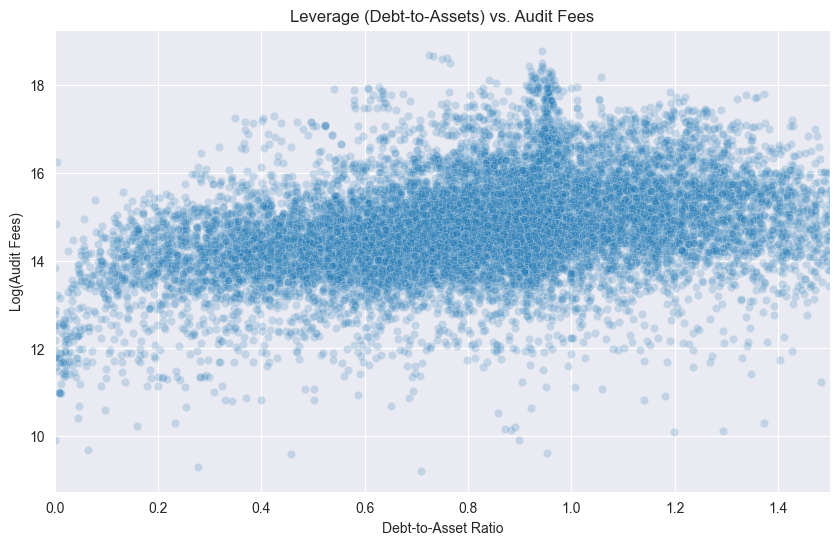

In [24]:
# --- 4.6: Feature Engineering - Financial Ratios ---
# Rationale: We can derive new "Risk" variables using our existing data.
# 1. Debt-to-Asset Ratio: Proxies for financial leverage and solvency risk.
# 2. Return on Assets (ROA): Proxies for management efficiency and performance.

# Calculate Total Liabilities (Assets - Equity)
# We use the raw variables, not the log variables.
df_clean['total_liabilities'] = df_clean['total_assets'] - df_clean['book_value']

# 1. Create Debt-to-Asset Ratio
df_clean['debt_to_assets'] = df_clean['total_liabilities'] / df_clean['total_assets']

# 2. Create Return on Assets (ROA)
df_clean['roa'] = df_clean['net_income_ttm'] / df_clean['total_assets']

# --- Validation ---
# Ratios can sometimes produce extreme outliers (e.g., if assets are tiny).
# Let's check the summary stats to ensure they look reasonable.
# A standard Debt Ratio is between 0 and 1.
# A standard ROA is usually between -0.5 and 0.3.

ratio_cols = ['debt_to_assets', 'roa']
print("--- Summary Statistics for New Ratios ---")
print(df_clean[ratio_cols].describe())

# Optional: Scatterplot to see if Leverage affects Fees
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='debt_to_assets', y='log_audit_fees', alpha=0.2)
plt.title('Leverage (Debt-to-Assets) vs. Audit Fees')
plt.xlabel('Debt-to-Asset Ratio')
plt.ylabel('Log(Audit Fees)')
plt.xlim(0, 1.5) # Limit x-axis to remove extreme outliers for the chart
plt.show()

Part 5: Exploratory Data Analysis (EDA)

In [25]:
### Part 5: Exploratory Data Analysis (EDA)
# Rationale: Now that our data is clean, we need to understand it.
# This section fulfills the mandatory requirements for summary
# statistics and visualizations.

# --- 5.1: Summary Statistics for Model Variables ---
# Rationale: This table provides a high-level overview of our
# final dataset. It's crucial for understanding the scale
# and distribution of our variables.

# List of our final model variables
model_vars = [
    'log_audit_fees',
    'log_total_assets',
    'log_book_value',
    'log_cam_count',
    'is_loss'
]

# Run .describe() on just these columns
print("--- Summary Statistics for Final Model Variables ---")
print(df_clean[model_vars].describe())

# We also want to see the distribution of our categorical industry variable
print("\n--- Top 10 Industries (by 2-digit SIC) ---")
print(df_clean['sic_industry'].value_counts().head(10))

--- Summary Statistics for Final Model Variables ---
       log_audit_fees  log_total_assets  log_book_value  log_cam_count  \
count         14739.0           14739.0    10310.000000   14739.000000   
mean        14.754402         21.893848       20.337333       0.768124   
std          1.111031          2.091822        2.065212       0.422436   
min           9.21034          7.606885        6.907755       0.000000   
25%         14.079596         20.534972       19.086735       0.693147   
50%         14.707909         21.844848       20.293432       0.693147   
75%         15.421829         23.237524       21.614615       1.098612   
max         18.785324         29.018019       26.997745       3.091042   

            is_loss  
count  14739.000000  
mean       0.368614  
std        0.482445  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  

--- Top 10 Industries (by 2-digit SIC) ---
sic_industry
73    2310
28    1621
36 

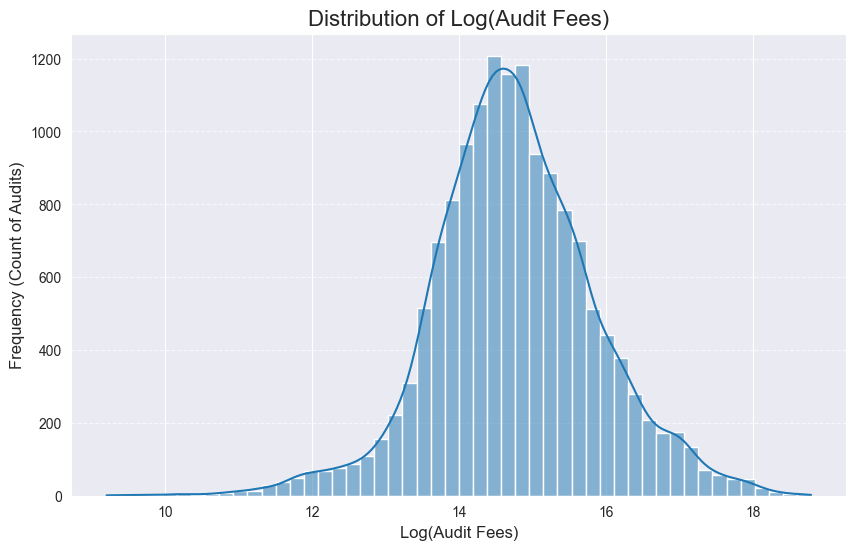

In [26]:
# --- 5.2: Visualization 1 - Distribution of (Log) Audit Fees ---
# Rationale: This is a key visualization to show the distribution
# of our dependent variable. A "normal" (bell-shaped) curve
# is ideal for linear regression.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) # Set a good size for the plot

# Use seaborn's 'histplot'
sns.histplot(
    df_clean['log_audit_fees'],
    kde=True, # 'kde' adds the smooth line showing the density
    bins=50 # 'bins' controls how many bars. 50 is a good start.
)

# --- Make it "Presentation-Ready" ---
plt.title('Distribution of Log(Audit Fees)', fontsize=16)
plt.xlabel('Log(Audit Fees)', fontsize=12)
plt.ylabel('Frequency (Count of Audits)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot in your notebook
plt.show()

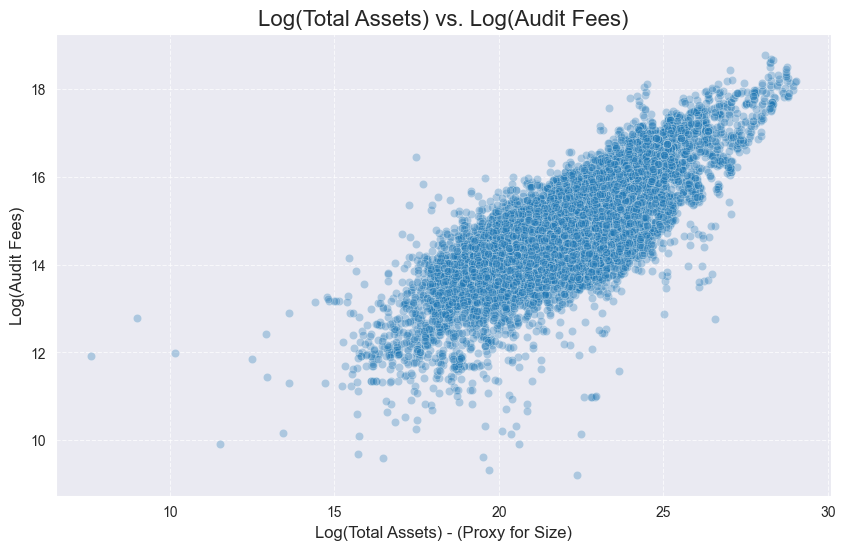

In [27]:
# --- 5.3: Visualization 2 - Scatterplot of (Log) Assets vs. (Log) Fees ---
# Rationale: This scatterplot tests our primary hypothesis:
# "Do bigger companies (more assets) pay higher audit fees?"
# We expect to see a positive, upward-sloping relationship.

plt.figure(figsize=(10, 6))

# Use seaborn's 'scatterplot'
sns.scatterplot(
    data=df_clean,
    x='log_total_assets',
    y='log_audit_fees',
    alpha=0.3 # 'alpha' makes points transparent to show density
)

# --- Make it "Presentation-Ready" ---
plt.title('Log(Total Assets) vs. Log(Audit Fees)', fontsize=16)
plt.xlabel('Log(Total Assets) - (Proxy for Size)', fontsize=12)
plt.ylabel('Log(Audit Fees)', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)

# Display the plot in your notebook
plt.show()

Part 6: Regression Analysis

In [28]:
### Part 6: Regression Analysis
# Rationale: This is the final step of our analysis, as outlined
# in our proposal. We will build an Ordinary Least Squares (OLS)
# regression model to identify the drivers of audit fees.

import statsmodels.formula.api as smf

# --- 6.1: Prepare Final Data for Regression ---
# Rationale: Our model requires complete data. We will create a
# final dataset 'df_model' that drops any remaining 'NaN'
# values (e.g., from 'log_book_value').

# Define the final list of variables for the model
model_cols = [
    'log_audit_fees',
    'log_total_assets',
    'log_book_value',
    'log_cam_count',
    'is_loss',
    'sic_industry'
]

# Create a new DataFrame and drop any rows with NaNs
df_model = df_clean[model_cols].dropna()

print(f"Original clean rows: {len(df_clean)}")
print(f"Rows for regression model (after dropping all NaNs): {len(df_model)}")

Original clean rows: 14739
Rows for regression model (after dropping all NaNs): 10310


In [29]:
# --- 6.2: Build and Fit the OLS Model ---
# Rationale: We define our model formula.
# - 'log_audit_fees' is the dependent variable (y)
# - All others are independent variables (X)
# - We wrap 'sic_industry' in 'C()' to tell statsmodels
#   to treat it as a categorical variable (i.e., create dummies).

# Define the formula
formula = """
    log_audit_fees ~ log_total_assets +
                     log_book_value +
                     log_cam_count +
                     is_loss +
                     C(sic_industry)
"""

print("\nBuilding and fitting regression model...")

# Create the model
model = smf.ols(formula=formula, data=df_model)

# Fit the model
results = model.fit()


Building and fitting regression model...


In [30]:
# --- 6.3: Print the Regression Results ---
# Rationale: This output table is the primary deliverable
# of our analysis. It contains the coefficients, p-values,
# and R-squared.

print("\n--- OLS Regression Results ---")
print(results.summary())


--- OLS Regression Results ---
                            OLS Regression Results                            
Dep. Variable:         log_audit_fees   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     345.3
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        11:49:14   Log-Likelihood:                -9527.5
No. Observations:               10310   AIC:                         1.920e+04
Df Residuals:                   10239   BIC:                         1.971e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

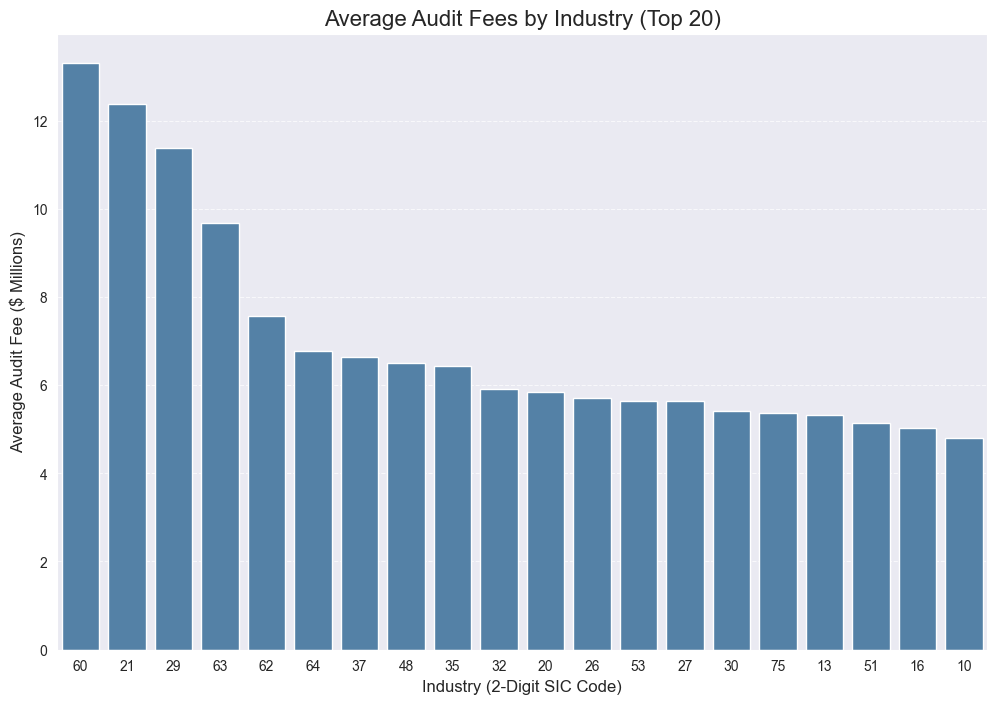

In [31]:
# --- 5.4: Visualization 3 - Mean Audit Fees by Industry (Top 20) ---
# Rationale: We want to see if certain industries inherently pay more.
# Because there are many SIC codes, we filter for the top 20
# most expensive industries to keep the chart readable for the presentation.

# 1. Prepare the data
# Group by industry and calculate the mean audit fee
industry_means = df_clean.groupby('sic_industry')['audit_fees'].mean().reset_index()

# Sort from highest to lowest
industry_means = industry_means.sort_values('audit_fees', ascending=False)

# Select only the top 20 for the plot
top_20_industries = industry_means.head(20)

# 2. Create the Bar Chart
plt.figure(figsize=(12, 8)) # Make it large enough to read

# Create the barplot
# We divide by 1,000,000 to make the y-axis readable (Millions)
sns.barplot(
    data=top_20_industries,
    x='sic_industry',
    y=top_20_industries['audit_fees'] / 1000000, # Convert to Millions
    color='steelblue' # Use a single clean color (avoid "rainbow" clutter)
)

# 3. Format for Presentation
plt.title('Average Audit Fees by Industry (Top 20)', fontsize=16)
plt.xlabel('Industry (2-Digit SIC Code)', fontsize=12)
plt.ylabel('Average Audit Fee ($ Millions)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


--- Regression A: Debt-to-Assets Ratio vs. Log(Audit Fees) ---
                            OLS Regression Results                            
Dep. Variable:         log_audit_fees   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     16.82
Date:                Wed, 03 Dec 2025   Prob (F-statistic):           4.14e-05
Time:                        11:49:15   Log-Likelihood:                -22457.
No. Observations:               14739   AIC:                         4.492e+04
Df Residuals:                   14737   BIC:                         4.493e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

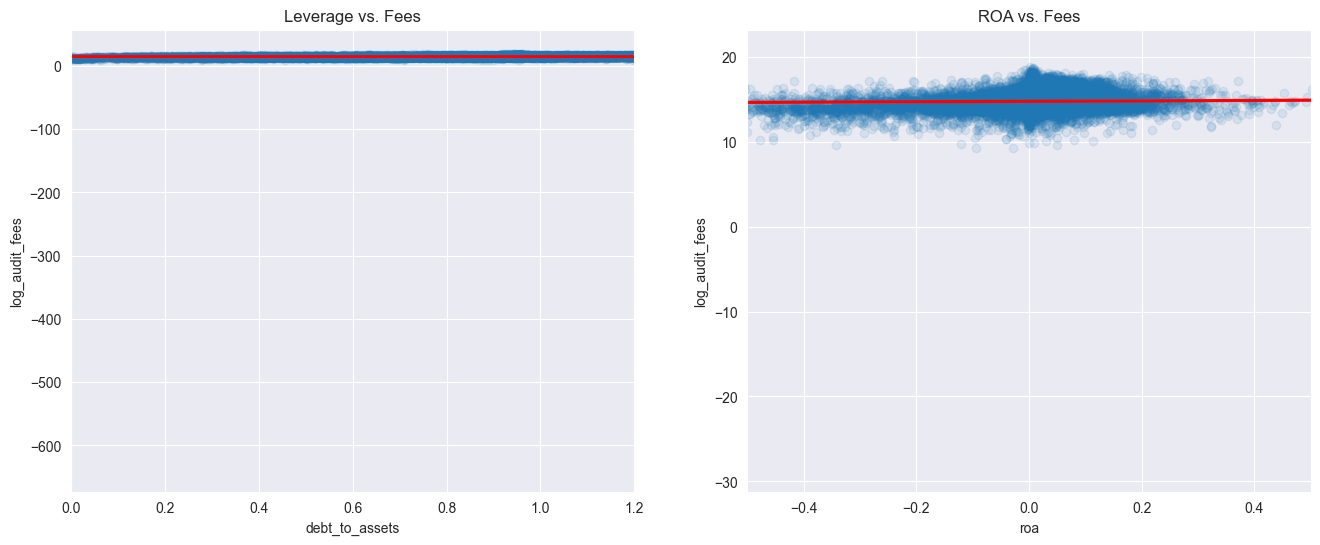

In [32]:
# --- 6.5: Simple Regressions for Risk Factors ---
# Rationale: We want to isolate the impact of financial risk (Leverage)
# and performance (ROA) on audit fees individually.

# Make sure we have the ratios (in case you didn't run the previous optional step)
# Calculate Total Liabilities (Assets - Equity)
df_clean['total_liabilities'] = df_clean['total_assets'] - df_clean['book_value']
df_clean['debt_to_assets'] = df_clean['total_liabilities'] / df_clean['total_assets']
df_clean['roa'] = df_clean['net_income_ttm'] / df_clean['total_assets']

# --- Regression A: Leverage vs. Fees ---
print("\n--- Regression A: Debt-to-Assets Ratio vs. Log(Audit Fees) ---")
# Hypothesis: Positive relationship (More Debt = Higher Risk = Higher Fees)
model_lev = smf.ols("log_audit_fees ~ debt_to_assets", data=df_clean)
results_lev = model_lev.fit()
print(results_lev.summary())

# --- Regression B: ROA vs. Fees ---
print("\n--- Regression B: ROA vs. Log(Audit Fees) ---")
# Hypothesis: Negative relationship (Higher ROA = Better Performance = Lower Risk = Lower Fees)
model_roa = smf.ols("log_audit_fees ~ roa", data=df_clean)
results_roa = model_roa.fit()
print(results_roa.summary())

# --- Optional: Visualizing the Trend Lines ---
# It helps to see the line of best fit for these simple regressions
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Leverage
sns.regplot(ax=axes[0], data=df_clean, x='debt_to_assets', y='log_audit_fees',
            scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
axes[0].set_title('Leverage vs. Fees')
axes[0].set_xlim(0, 1.2) # Limit x-axis to standard range

# Plot 2: ROA
sns.regplot(ax=axes[1], data=df_clean, x='roa', y='log_audit_fees',
            scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
axes[1].set_title('ROA vs. Fees')
axes[1].set_xlim(-0.5, 0.5) # Limit x-axis to standard range

plt.show()

In [33]:
# --- 6.6: Risk Factor Regressions Controlling for Size ---
# Rationale: We previously found that simple regressions were misleading
# because they ignored company size. Now we add 'log_total_assets'
# to control for the "Elephant vs. Mouse" effect.

# --- Regression C: Leverage + Size ---
print("\n--- Regression C: Debt-to-Assets + Log(Assets) ---")
# Hypothesis: With size controlled, Debt should still be positive (Risk -> Fees)
# and R-squared should be much higher.
model_lev_size = smf.ols("log_audit_fees ~ debt_to_assets + log_total_assets", data=df_clean)
results_lev_size = model_lev_size.fit()
print(results_lev_size.summary())

# --- Regression D: ROA + Size ---
print("\n--- Regression D: ROA + Log(Assets) ---")
# Hypothesis: With size controlled, ROA should flip to NEGATIVE (Better Performance -> Lower Fees)
model_roa_size = smf.ols("log_audit_fees ~ roa + log_total_assets", data=df_clean)
results_roa_size = model_roa_size.fit()
print(results_roa_size.summary())


--- Regression C: Debt-to-Assets + Log(Assets) ---
                            OLS Regression Results                            
Dep. Variable:         log_audit_fees   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 1.173e+04
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        11:49:16   Log-Likelihood:                -15446.
No. Observations:               14739   AIC:                         3.090e+04
Df Residuals:                   14736   BIC:                         3.092e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------